<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/machine-learning/Model_Free_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Model Free RL

We will use OpenAI Gymnasium (formerly OpenAI Gym) to implement Model-Free Reinforcement Learning using the Q-Learning algorithm.

# **Install the requirements libraries**

In [1]:
!pip install gymnasium

In [3]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import gymnasium as gym


# **Step 1:  Understand the Environment**

We will use the Taxi-v3 environment from OpenAI Gymnasium a classic RL problem designed to train an agent to navigate a grid world and transport passengers efficiently.

In [4]:
env = gym.make('Taxi-v3', render_mode='ansi')
env.reset()

print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




# **Step 2:  Create the Q-Learning Agent**

The Q-Learning Agent follows a table-based approach where Q-values for each state-action pair are updated based on interactions with the environment.

In [5]:
class QLearningAgent:
    def __init__(self, env, learning_rate, initial_epsilon, epsilon_decay, final_epsilon, discount_factor=0.95
                 ):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        # Initialize an empty dictionary of state-action values
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

    def get_action(self, obs) -> int:
        x = np.random.rand()
        if x < self.final_epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_values[obs])

    def update(self, obs, action, reward, terminated, next_obs):
        if not terminated:
            future_q_value = np.max(self.q_values[next_obs])
            self.q_values[obs][action] += self.learning_rate * \
                (reward + self.discount_factor *
                 future_q_value - self.q_values[obs][action])

    def decay_epsilon(self):
        """Decrease the exploration rate epsilon until it reaches its final value"""
        self.epsilon = max(self.final_epsilon,
                           self.epsilon - self.epsilon_decay)

# **Step 3: Define our training method**

The train_agent function is responsible for training the provided Q-learning agent in a given environment over a specified number of episodes. The training steps are:

  *  Reset the environment at the start of each episode.

  * Select an action using the agent's get_action method.

  * Execute the action, observe the next state, reward and termination condition.
  * Update the Q-values based on received rewards.
  * Decay the exploration rate gradually.
  * Track performance, calculating the best average reward

In [6]:
def train_agent(agent, env, episodes, eval_interval=100):
    rewards = []
    best_reward = -np.inf
    for i in range(episodes):
        obs, _ = env.reset()
        terminated = False
        truncated = False
        length = 0
        total_reward = 0

        while (terminated == False) and (truncated == False):

            action = agent.get_action(obs)
            next_obs, reward, terminated, truncated, _ = env.step(action)

            agent.update(obs, action, reward, terminated, next_obs)
            obs = next_obs
            length = length + 1
            total_reward += reward

        agent.decay_epsilon()
        rewards.append(total_reward)

        if i >= eval_interval:
            avg_return = np.mean(rewards[i - eval_interval: i])
            best_reward = max(avg_return, best_reward)
        if i % eval_interval == 0 and i > 0:

            print(f"Episode{i} -> best_reward={best_reward} ")
    return rewards

# **Step 4:  Running our training method**

Sets up parameters for training such as the number of episodes, learning rate, discount factor and exploration rates.

  * Creates the Taxi-v3 environment from OpenAI Gym.
  * Initializes a Q-learning agent (QLearningAgent) with the specified parameters.
  * Calls the train_agent function to train the agent using the specified environment and parameters.

In [7]:
episodes = 20000
learning_rate = 0.5
discount_factor = 0.95
initial_epsilon = 1
final_epsilon = 0
epsilon_decay = ((final_epsilon - initial_epsilon) / (episodes / 2))
env = gym.make('Taxi-v3', render_mode='ansi')
agent = QLearningAgent(env, learning_rate, initial_epsilon,
                       epsilon_decay, final_epsilon)

returns = train_agent(agent, env, episodes)

Episode100 -> best_reward=-227.4 
Episode200 -> best_reward=-109.55 
Episode300 -> best_reward=-46.84 
Episode400 -> best_reward=-14.1 
Episode500 -> best_reward=-2.38 
Episode600 -> best_reward=-0.34 
Episode700 -> best_reward=-0.33 
Episode800 -> best_reward=1.95 
Episode900 -> best_reward=3.82 
Episode1000 -> best_reward=4.52 
Episode1100 -> best_reward=6.2 
Episode1200 -> best_reward=6.37 
Episode1300 -> best_reward=6.94 
Episode1400 -> best_reward=6.94 
Episode1500 -> best_reward=7.32 
Episode1600 -> best_reward=7.54 
Episode1700 -> best_reward=7.62 
Episode1800 -> best_reward=7.62 
Episode1900 -> best_reward=7.62 
Episode2000 -> best_reward=7.62 
Episode2100 -> best_reward=7.79 
Episode2200 -> best_reward=7.83 
Episode2300 -> best_reward=8.11 
Episode2400 -> best_reward=8.6 
Episode2500 -> best_reward=8.67 
Episode2600 -> best_reward=8.67 
Episode2700 -> best_reward=8.67 
Episode2800 -> best_reward=8.67 
Episode2900 -> best_reward=8.67 
Episode3000 -> best_reward=8.67 
Episode310

# **Step 5:  Plotting our returns**

We plot episode returns over time to observe improvements in agent performance.

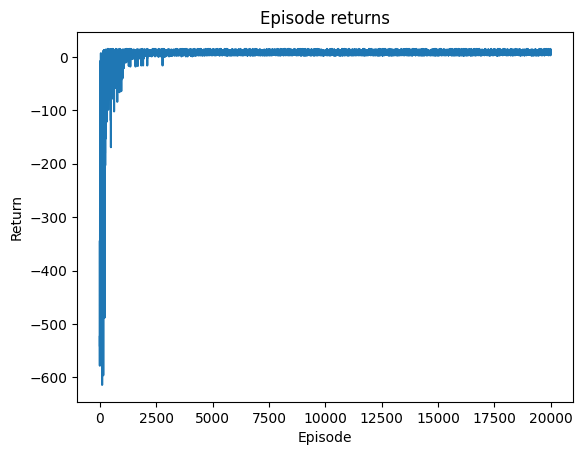

In [8]:
def plot_returns(returns):
    plt.plot(np.arange(len(returns)), returns)
    plt.title('Episode returns')
    plt.xlabel('Episode')
    plt.ylabel('Return')
    plt.show()


plot_returns(returns)

# **Step 6:  Running our Agent**

The run_agent function allows the trained agent to navigate the Taxi-v3 environment using its learned Q-values. The execution steps are:

  1.  Set epsilon =0 (agent fully exploits learned policy).

  2.  Reset environment and render the initial state.
  3. Loop until termination, selecting optimal actions.
  4.   Render updated states after each action.

In [9]:
def run_agent(agent, env):
    agent.epsilon = 0
    obs, _ = env.reset()
    env.render()
    terminated = truncated = False

    while terminated == False and truncated == False:
        action = agent.get_action(obs)
        next_obs, _, terminated, truncated, _ = env.step(action)
        print(env.render())

        obs = next_obs


env = gym.make('Taxi-v3', render_mode='ansi')
run_agent(agent, env)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | 